<table class="ee-notebook-buttons" align="left"><td>
<a target="_blank"  href="https://colab.research.google.com/drive/1Ql88wX6Ucjot4BZrHTqeV2V-Hc5bDqMN#scrollTo=WfzIAI-J6TEO">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a>
</td><td>
<a target="_blank"  href="https://github.com/biagiominio/Remote_sensing_2021/blob/main/R_code_remote_sensing_first.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td></table>

# Raster data manipulation
The [raster](https://www.rdocumentation.org/packages/raster/versions/3.4-5) package provides classes and functions to manipulate geographic (spatial) data in "raster" format. Raster data divides space into cells (rectangles; pixels) of equal size (in units of the coordinate reference system). Such continuous spatial data are also referred to as "grid" data, and be contrasted with discrete (object based) spatial data (points, lines, polygons).

## Install R packages
The [install.packages](https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/install.packages) function is used to download and install packages from CRAN-like repositories.



In [ ]:
install.packages("raster")


The [library](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/library) function is used to load previously installed packages.

In [25]:
library(raster)

## Upload file manually
1. Download the image of the *Parakanã Indigenous Reserve* in the state of Pará (northern region of Brazil) using Landsat [data](https://drive.google.com/drive/folders/1buaEhfQgOdV6AxXvV6NKQi6PAQjknyNi?usp=sharing) from 2011.

2. On the left side of Google Colab click on the small folder icon named file ⇒ click the Upload icon ⇒ choose the files to upload from your Downloads folder and click OK ⇒ your files are now on Google Colab!



Set the current working directory of the R process with the [setwd](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/getwd) function.

In [28]:
setwd("/content")

## Reading spatial data
It is common to use the [brick](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/brick) function to read and view a multilevel object.

In [ ]:
p224r63_2011 <- brick("p224r63_2011_masked.grd")

Explore the properties of the `p224r63_2011` object.

In [43]:
p224r63_2011

class      : RasterBrick 
dimensions : 1499, 2967, 4447533, 7  (nrow, ncol, ncell, nlayers)
resolution : 30, 30  (x, y)
extent     : 579765, 668775, -522705, -477735  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=22 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
source     : /content/p224r63_2011_masked.grd 
names      :       B1_sre,       B2_sre,       B3_sre,       B4_sre,       B5_sre,        B6_bt,       B7_sre 
min values : 0.000000e+00, 0.000000e+00, 0.000000e+00, 1.196277e-02, 4.116526e-03, 2.951000e+02, 0.000000e+00 
max values :    0.1249041,    0.2563655,    0.2591587,    0.5592193,    0.4894984,  305.2000000,    0.3692634 


### Lansat bands
##### B1 = *Blue* 
##### B2 = *Green*
##### B3 = *Red*
##### B4 = *Near Infrared*
##### B5 = *Short Wave Infrared*
##### B6 = *Thermal Infrared*
##### B7 = *Short Wave Infrared*

## Visualization of spatial data
Several generic functions have been implemented for "raster" objects to create maps and other plot types. For example, use [plot](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/plot) function to create a map of a raster object.

In [ ]:
plot(p224r63_2011)

### Colour change
Use function [colorRampPalette](https://www.rdocumentation.org/packages/dichromat/versions/1.1/topics/colorRampPalette) to create a continuous color scale divided into `n` levels.

In [ ]:
n <- 100
cl <- colorRampPalette(c("black","grey","light grey")) (n)
plot(p224r63_2011, col=cl)

In [ ]:
cl <- colorRampPalette(c("magenta","blue","green","yellow","red")) (n*2)
plot(p224r63_2011, col=cl)

Multi-layer Raster objects can be plotted as individual layers. Select a single band or layer with the `$` operator.



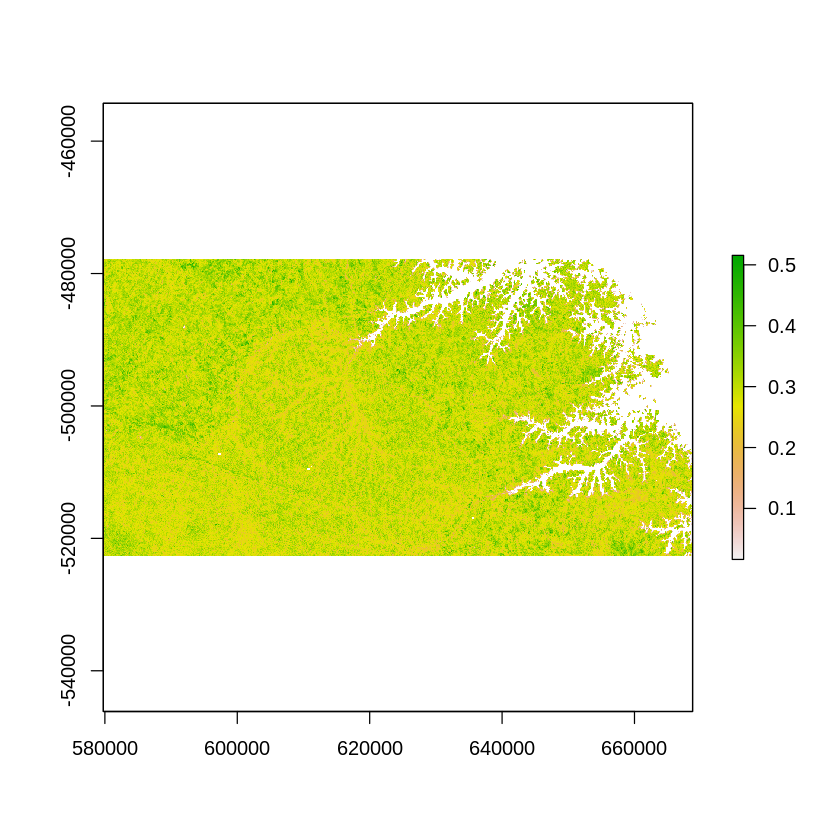

In [34]:
plot(p224r63_2011$B4_sre)

Individual bands can also be combined into a single image by assigning individual layers or bands to one of the three color channels (red, green and blue). 
The [plotRGB](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/plotRGB) function can be used to make "true (or false) color images" from Landsat and other multi-band satellite images.
In the `plotRGB` function the `stretch` argument increases the contrast of the image through the use of two [methods](http://spatial-analyst.net/ILWIS/htm/ilwisapp/stretch_functionality.htm): "lin" or "hist".


In [ ]:
# true color image with linear stretch
plotRGB(p224r63_2011, r = 3, g = 2, b = 1, stretch = "lin")

In [ ]:
# false color image with histogram stretch
plotRGB(p224r63_2011, r = 3, g = 2, b = 1, stretch = "hist")

### Multi-frame images

In [ ]:
# 1 row, 2 columns
par(mfrow=c(1,2))
plot(p224r63_2011$B1_sre)
plot(p224r63_2011$B2_sre)


In [ ]:
# 2 row, 1 columns
par(mfrow=c(2,1)) # if you are using columns first: par(mfcol....)
plot(p224r63_2011$B1_sre)
plot(p224r63_2011$B2_sre)


In [ ]:
# plot the first four bands of Landsat
par(mfrow=c(4,1))
plot(p224r63_2011$B1_sre)
plot(p224r63_2011$B2_sre)
plot(p224r63_2011$B3_sre)
plot(p224r63_2011$B4_sre)

In [ ]:
# a quadrat of bands...:
par(mfrow=c(2,2))
plot(p224r63_2011$B1_sre)
plot(p224r63_2011$B2_sre)
plot(p224r63_2011$B3_sre)
plot(p224r63_2011$B4_sre)

In [ ]:
# a quadrat of bands...:
par(mfrow=c(2,2))
clb <- colorRampPalette(c("dark blue","blue","light blue")) (100)
plot(p224r63_2011$B1_sre, col=clb)
clg <- colorRampPalette(c("dark green","green","light green")) (100)
plot(p224r63_2011$B2_sre, col=clg)
clr <- colorRampPalette(c("dark red","red","pink")) (100)
plot(p224r63_2011$B3_sre, col=clr)
clnir <- colorRampPalette(c("red","orange","yellow")) (100)
plot(p224r63_2011$B4_sre, col=clnir)


In [ ]:
# plot RGB
# Exercise: mount a 2x2 multiframe
par(mfrow=c(2,2))
plotRGB(p224r63_2011, r=3, g=2, b=1, stretch="Lin")
plotRGB(p224r63_2011, r=4, g=3, b=2, stretch="Lin")
plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="Lin")
plotRGB(p224r63_2011, r=3, g=2, b=4, stretch="Lin")


In [ ]:
# pdf("il_mio_primo_pdf_con_R.pdf")
# par(mfrow=c(2,2))
# plotRGB(p224r63_2011, r=3, g=2, b=1, stretch="Lin")
# plotRGB(p224r63_2011, r=4, g=3, b=2, stretch="Lin")
# plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="Lin")
# plotRGB(p224r63_2011, r=3, g=2, b=4, stretch="Lin")
# dev.off()
plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="Lin")
plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="hist")
# par natural colours, flase colours, and false colours with histogram stretching
par(mfrow=c(3,1))


In [ ]:
plotRGB(p224r63_2011, r=3, g=2, b=1, stretch="Lin")
plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="Lin")
plotRGB(p224r63_2011, r=3, g=4, b=2, stretch="hist")


In [ ]:
sessionInfo()